## Installing Libs
<b>note: Please install vsstudio c++ build tool more than 14v in windows<b>

In [ ]:
!pip install DeepImageSearch
!pip install gradio

## importing libs

In [38]:
from DeepImageSearch import Index,LoadData,SearchImage
import matplotlib.pyplot as plt

In [34]:
path = "C://Users/admin/Pictures/Dataset/"
image_list =LoadData().from_folder([path])

In [110]:
Index(image_list).Start()

Metadata and Features are allready present, Do you want Extract Again? Enter yes or no
no
Meta data allready Present, Please Apply Search!
['image_data_features.pkl', 'image_features_vectors.ann']


In [115]:
img = SearchImage().get_similar_images(image_path=image_list[0],number_of_images=2)

1/1 [==============================] - 0s 417ms/step


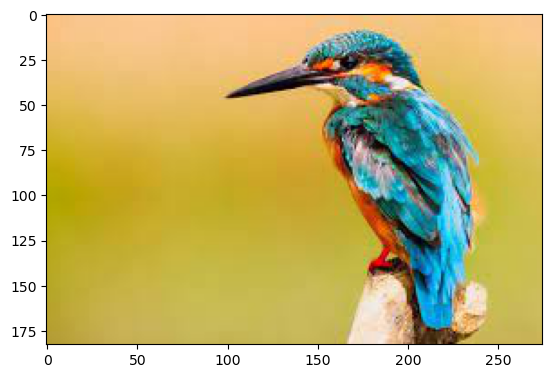

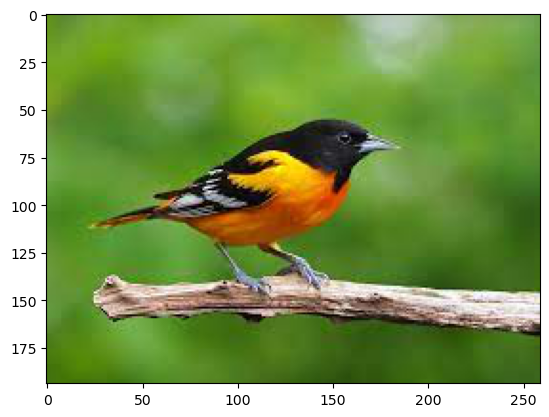

In [41]:
for i in img.values(): 
    ik = plt.imread(i); plt.imshow(ik); plt.show()

# Gradio App

In [118]:
import gradio as gr
def update(path,file):
    image_list =LoadData().from_folder([path])
    res = SearchImage().get_similar_images(image_path=file,number_of_images=2)
    outcome = list(res.values())[-1]
    return Image.open(file),Image.open(outcome)
    
with gr.Blocks() as demo:
    gr.Markdown("Image Search")
    with gr.Row():
        with gr.Column(scale=1):
            inp = gr.Text(placeholder="Image folder path",label='Folder Path')
            imgfile = gr.Text(placeholder="Image file path",label='File Path')
            #imgshow = gr.Image(imgdata)
            with gr.Row():
                #if img.value is not None:
                imge = gr.Image()
                
                #imge.render()
        out = gr.Image(label='Output')
    btn = gr.Button("Run")
    btn.click(fn=update, inputs=[inp,imgfile], outputs=[imge,out])


demo.launch()

Running on local URL:  http://127.0.0.1:7912

To create a public link, set `share=True` in `launch()`.
